In [ ]:
# 월요일부터 딥러닝(텐서플로)
# 화요일 CNN + 팀원 확정
# 수요일 팀원끼리 회의실에서 프로젝트 진행
# 금요일 RNN, YOLO
# 7월 첫째주도 과정에 없는 내용인 파인튜닝 공부 진행(기술적 난이도가 조금 높음)
# 파인튜닝은 GPT, BERT 파인튜닝을 할 것임

In [ ]:
# 8월 16일에 최종산출물 업로드가 끝나야함
# 외부 심사위원이 와서 심사를 해줄 것임

https://github.com/lsjsj92/recommender_system_with_Python/blob/master/004.%20recommender%20system%20basic%20with%20Python%20-%203%20Matrix%20Factorization.ipynb
위 코드 참고할 것

In [1]:
import pandas as pd
import numpy as np

In [2]:
rating_data=pd.read_csv("movies/ratings.csv")
movie_data=pd.read_csv("movies/movies.csv")
rating_data.drop('timestamp', axis = 1, inplace = True)
movie_data.drop('genres', axis = 1, inplace = True)
rating_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
movie_data.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df_user_movie_ratings = rating_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)
df_user_movie_ratings

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# matrix = df_user_movie_ratings.as_matrix() 기존엔 이거였는데 에러 나는듯
matrix = df_user_movie_ratings.to_numpy() # values를 사용해도 무관함. 배열로 변경하기 때문임
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.]])

In [18]:
user_ratings_mean = np.mean(matrix, axis = 1)
user_ratings_mean.shape

(671,)

In [19]:
matrix_user_mean = matrix - user_ratings_mean.reshape(-1,1)
matrix_user_mean # 각 사용자 각 영화에 대한 평점 - 사용자 평점 평균 뺀 점수

array([[-0.00562541, -0.00562541, -0.00562541, ..., -0.00562541,
        -0.00562541, -0.00562541],
       [-0.02923009, -0.02923009, -0.02923009, ..., -0.02923009,
        -0.02923009, -0.02923009],
       [-0.02007501, -0.02007501, -0.02007501, ..., -0.02007501,
        -0.02007501, -0.02007501],
       ...,
       [-0.01367748, -0.01367748, -0.01367748, ..., -0.01367748,
        -0.01367748, -0.01367748],
       [ 3.98698434, -0.01301566, -0.01301566, ..., -0.01301566,
        -0.01301566, -0.01301566],
       [ 4.95030885, -0.04969115, -0.04969115, ..., -0.04969115,
        -0.04969115, -0.04969115]])

In [20]:
pd.DataFrame(matrix_user_mean, columns = df_user_movie_ratings.columns).head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,...,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625
1,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,3.970770,...,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230
2,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,...,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075
3,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,3.902162,...,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838
4,-0.043128,-0.043128,3.956872,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,...,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128


In [21]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse.linalg import svds

In [28]:
user_movie_data = pd.merge(rating_data, movie_data, on = 'movieId')
print(user_movie_data.shape)
user_movie_data.head()

(100004, 4)


,userId,movieId,rating,title
0,1,31,2.5,Dangerous Minds (1995)
1,7,31,3.0,Dangerous Minds (1995)
2,31,31,4.0,Dangerous Minds (1995)
3,32,31,4.0,Dangerous Minds (1995)
4,36,31,3.0,Dangerous Minds (1995)


In [27]:
user_movie_rating = user_movie_data.pivot_table('rating', index = 'userId', columns='title').fillna(0)
user_movie_data.head()

,userId,movieId,rating,title
0,1,31,2.5,Dangerous Minds (1995)
1,7,31,3.0,Dangerous Minds (1995)
2,31,31,4.0,Dangerous Minds (1995)
3,32,31,4.0,Dangerous Minds (1995)
4,36,31,3.0,Dangerous Minds (1995)


In [29]:
user_movie_data.T

,0,1,2,3,4,5,6,7,8,9,...,99994,99995,99996,99997,99998,99999,100000,100001,100002,100003
userId,1,7,31,32,36,39,73,88,96,110,...,663,663,663,663,664,664,664,665,665,668
movieId,31,31,31,31,31,31,31,31,31,31,...,134528,134783,137595,138204,60832,64997,72380,129,4736,6425
rating,2.5,3.0,4.0,4.0,3.0,3.0,3.5,3.0,2.5,4.0,...,3.5,3.0,3.0,3.5,3.0,2.5,3.5,3.0,1.0,1.0
title,Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),Dangerous Minds (1995),...,Aloha (2015),Entourage (2015),Magic Mike XXL (2015),7 Days in Hell (2015),Pathology (2008),War of the Worlds (2005),"Box, The (2009)",Pie in the Sky (1996),Summer Catch (2001),"6th Man, The (Sixth Man, The) (1997)"


In [30]:
movie_user_rating = user_movie_rating.values.T
movie_user_rating.shape

(9064, 671)

In [32]:
movie_user_rating

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
#                        A     =           U     @  sigma  @  V   
# SVD(특이값 분해) : m * n 행렬 => 분해 => m*m행렬 @ m*n행렬 @ n*n행렬 => m * n 행렬
# 행렬 U, V의 열벡터는 특이벡터(singular vector)라고 함
# 행렬 sigma는 대각행렬(대각 요소를 제외한 나머지 요소값이 모두 0)이며, 대각 요소값을 행렬 A의 특이값이라고 함

# sklearn의 truncatedSVD를 이용하여 sigma행렬 대각원소(특이값) 가운데 상위 n개를 추출할 수 있음

# ex) 9064편의 영화, 671명의 사용자
# 내가 재밌게 본 영화와 유사한 영화를 추천
# 671차원 -> 10차원 : 각각의 영화에 대한 671명의 평가점수가 10개의 feature 값으로 압축

In [34]:
svd = TruncatedSVD(n_components=10)

In [35]:
mat = svd.fit_transform(movie_user_rating) # 671차원 -> 10차원 
mat.shape # 차원축소된 형태

(9064, 10)

In [36]:
mat[0] # "Great Performances" Cats (1998)에 대한 671명의 평가 점수를 100개의 잠재요인 값으로 압축

array([ 0.01227491,  0.00250765,  0.01554746, -0.03396882, -0.01444766,
        0.00361374, -0.00221276,  0.04501639, -0.01592302, -0.02168588])

- 선형대수 공부하기 적합함
- https://angeloyeo.github.io/
- https://angeloyeo.github.io/2020/09/07/basic_vector_operation.html 벡터

In [43]:
corr = np.corrcoef(mat) # 피어슨 상관계수 구하기
corr.shape

(9064, 9064)

In [47]:
corr[0] # 첫번째 영화와 다른 영화의 상관관계

# 9064편의 영화에 대한 671명의 평가 점수 행렬이 주어지고,
# 각각의 영화에 대한 671명의 평가 점수를 10개의 특성값으로 압축해서 표현
# => 9064 * 10 행렬이 나오게 됨 => 9064편 영화들에 대한 10개의 특성값으로 피어슨 상관계수를 구함
# => 9064 * 9064 상관계수 행렬이 구해짐
# ex)
# corr[0] 행 전체를 출력했을 때, 자신을 제외한 나머지 상관계수 중에서 최대값에 해당하는 index를 추출하여
# corr[0]에 해당하는 영화와 가장 유사한 영화 제목을 출력

array([ 1.        ,  0.37375202, -0.02043698, ...,  0.45319488,
        0.04426358,  0.16077428])

In [76]:
# 결국 위에서 구한 것들은 상관계수를 구하게 되므로 분산값도 작은 값으로 채택됨
movie_title = user_movie_rating.columns
movie_title_list = list(movie_title)
movie_title_list

['"Great Performances" Cats (1998)',
 '$9.99 (2008)',
 "'Hellboy': The Seeds of Creation (2004)",
 "'Neath the Arizona Skies (1934)",
 "'Round Midnight (1986)",
 "'Salem's Lot (2004)",
 "'Til There Was You (1997)",
 "'burbs, The (1989)",
 "'night Mother (1986)",
 '(500) Days of Summer (2009)',
 '*batteries not included (1987)',
 '...And God Spoke (1993)',
 '...And Justice for All (1979)',
 '1-900 (06) (1994)',
 '10 (1979)',
 '10 Attitudes (2001)',
 '10 Cloverfield Lane (2016)',
 '10 Items or Less (2006)',
 '10 Things I Hate About You (1999)',
 '10 Years (2011)',
 '10,000 BC (2008)',
 '100 Girls (2000)',
 '100 Rifles (1969)',
 '101 Dalmatians (1996)',
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
 '101 Reykjavik (101 Reykjavík) (2000)',
 '102 Dalmatians (2000)',
 '10th Kingdom, The (2000)',
 '11\'09"01 - September 11 (2002)',
 '11:14 (2003)',
 '12 Angry Men (1957)',
 '12 Angry Men (1997)',
 '12 Years a Slave (2013)',
 '127 Hours (2010)',
 '12:08 East of Bucharest (A fost sa

In [78]:
coffey_hands = movie_title_list.index("Guardians of the Galaxy (2014)")
coffey_hands

3405

In [79]:
corr[coffey_hands] # 상관계수가 0.9이상인 모든 영화의 제목을 출력

array([0.06962926, 0.26918168, 0.12553445, ..., 0.16130201, 0.35845959,
       0.88238264])

In [86]:
corr_df = pd.DataFrame(corr)
corr_df[corr_df[coffey_hands] >= 0.9].index
pd.DataFrame(movie_title_list).iloc[corr_df[corr_df[coffey_hands] >= 0.9].index].values
# 이것도 맞긴 함. 근데 코드가 너무 긺

275

In [ ]:
list(movie_title[corr[coffey_hands]>=0.9]) # 이게 명답임

In [ ]:
# 수학책을 한다면 선형대수를 공부하면 됨. 근데 쉽게 설명되는 것을 사는 것이 좋음
# 개인차가 크기 때문에 어떤 것을 보라고 권하기는 어려움
# 교보문고가서 봐야하나;
# 연봉 많이 받는 방법ㅋ - 선형대수 및 확률통계를 많이 공부해둘 것

# 머신러닝의 다양한 알고리즘을 이용한 타이타닉 솔루션

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
train.describe(include='O')
# top은 최빈값의 문자열을 의미함

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
# 학습, 테스트 데이터 총합 = 891+418=1309
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

In [100]:
print("생존율 : %.1f%%" % (len(survived)/len(train)*100))

생존율 : 38.4%


In [101]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [122]:
# 문제: pclass를 기준으로 생존자의 수를 출력
# pclass와 survived 열에 대해 pclass를 기준으로 그룹화를 한 다음 생존율의 평균을 출력
# train[train['Survived']==1]['Pclass'].value_counts()
train.groupby('Pclass')['Survived'].sum()
train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [121]:
train.groupby('Pclass').Survived.sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [135]:
train[['Pclass', 'Survived']].groupby(['Pclass'])
# train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()  # pclass를 열인덱스로 변경

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<Axes: xlabel='Pclass', ylabel='Survived'>

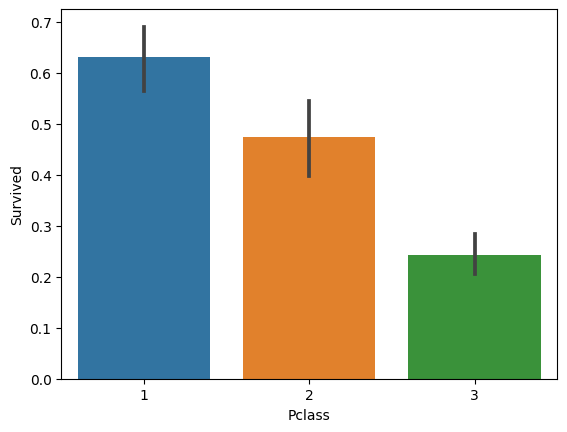

In [136]:
sns.barplot(x='Pclass', y='Survived', data=train)